In [2]:
import pandas as pd

In [4]:
df = pd.read_csv('car data.csv')

In [5]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [6]:
df.shape

(301, 9)

In [12]:
## Looking at the unique values in the Categorical variables

print(df['Fuel_Type'].unique())
print(df['Seller_Type'].unique())
print(df['Transmission'].unique())
print(df['Owner'].unique())

['Petrol' 'Diesel' 'CNG']
['Dealer' 'Individual']
['Manual' 'Automatic']
[0 1 3]


In [10]:
## check missing and Null values
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

- we do not have any Null values in our dataset

In [17]:
df[['Selling_Price','Present_Price','Kms_Driven']].describe()

,Selling_Price,Present_Price,Kms_Driven
count,301.000000,301.000000,301.000000
mean,4.661296,7.628472,36947.205980
std,5.082812,8.644115,38886.883882
min,0.100000,0.320000,500.000000
25%,0.900000,1.200000,15000.000000
50%,3.600000,6.400000,32000.000000
75%,6.000000,9.900000,48767.000000
max,35.000000,92.600000,500000.000000


In [18]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [19]:
final_dataset = df[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]

In [27]:
final_dataset.head(2)

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Years_Since_Manufacture
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,9
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,10


In [21]:
final_dataset['Current_Year'] = 2023

In [24]:
final_dataset['Years_Since_Manufacture'] = final_dataset['Current_Year'] - final_dataset['Year']

In [26]:
final_dataset.drop(['Year','Current_Year'],axis=1,inplace=True)

In [28]:
## Converting Categorical featues using Dummy variables (One Hot Encoding)

final_dataset = pd.get_dummies(final_dataset, drop_first=True)



In [29]:
final_dataset.head(2)

,Selling_Price,Present_Price,Kms_Driven,Owner,Years_Since_Manufacture,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,9,0,1,0,1
1,4.75,9.54,43000,0,10,1,0,0,1


In [30]:
# Calculating the Correlation
final_dataset.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,Years_Since_Manufacture,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
Years_Since_Manufacture,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


In [31]:
import seaborn as sns

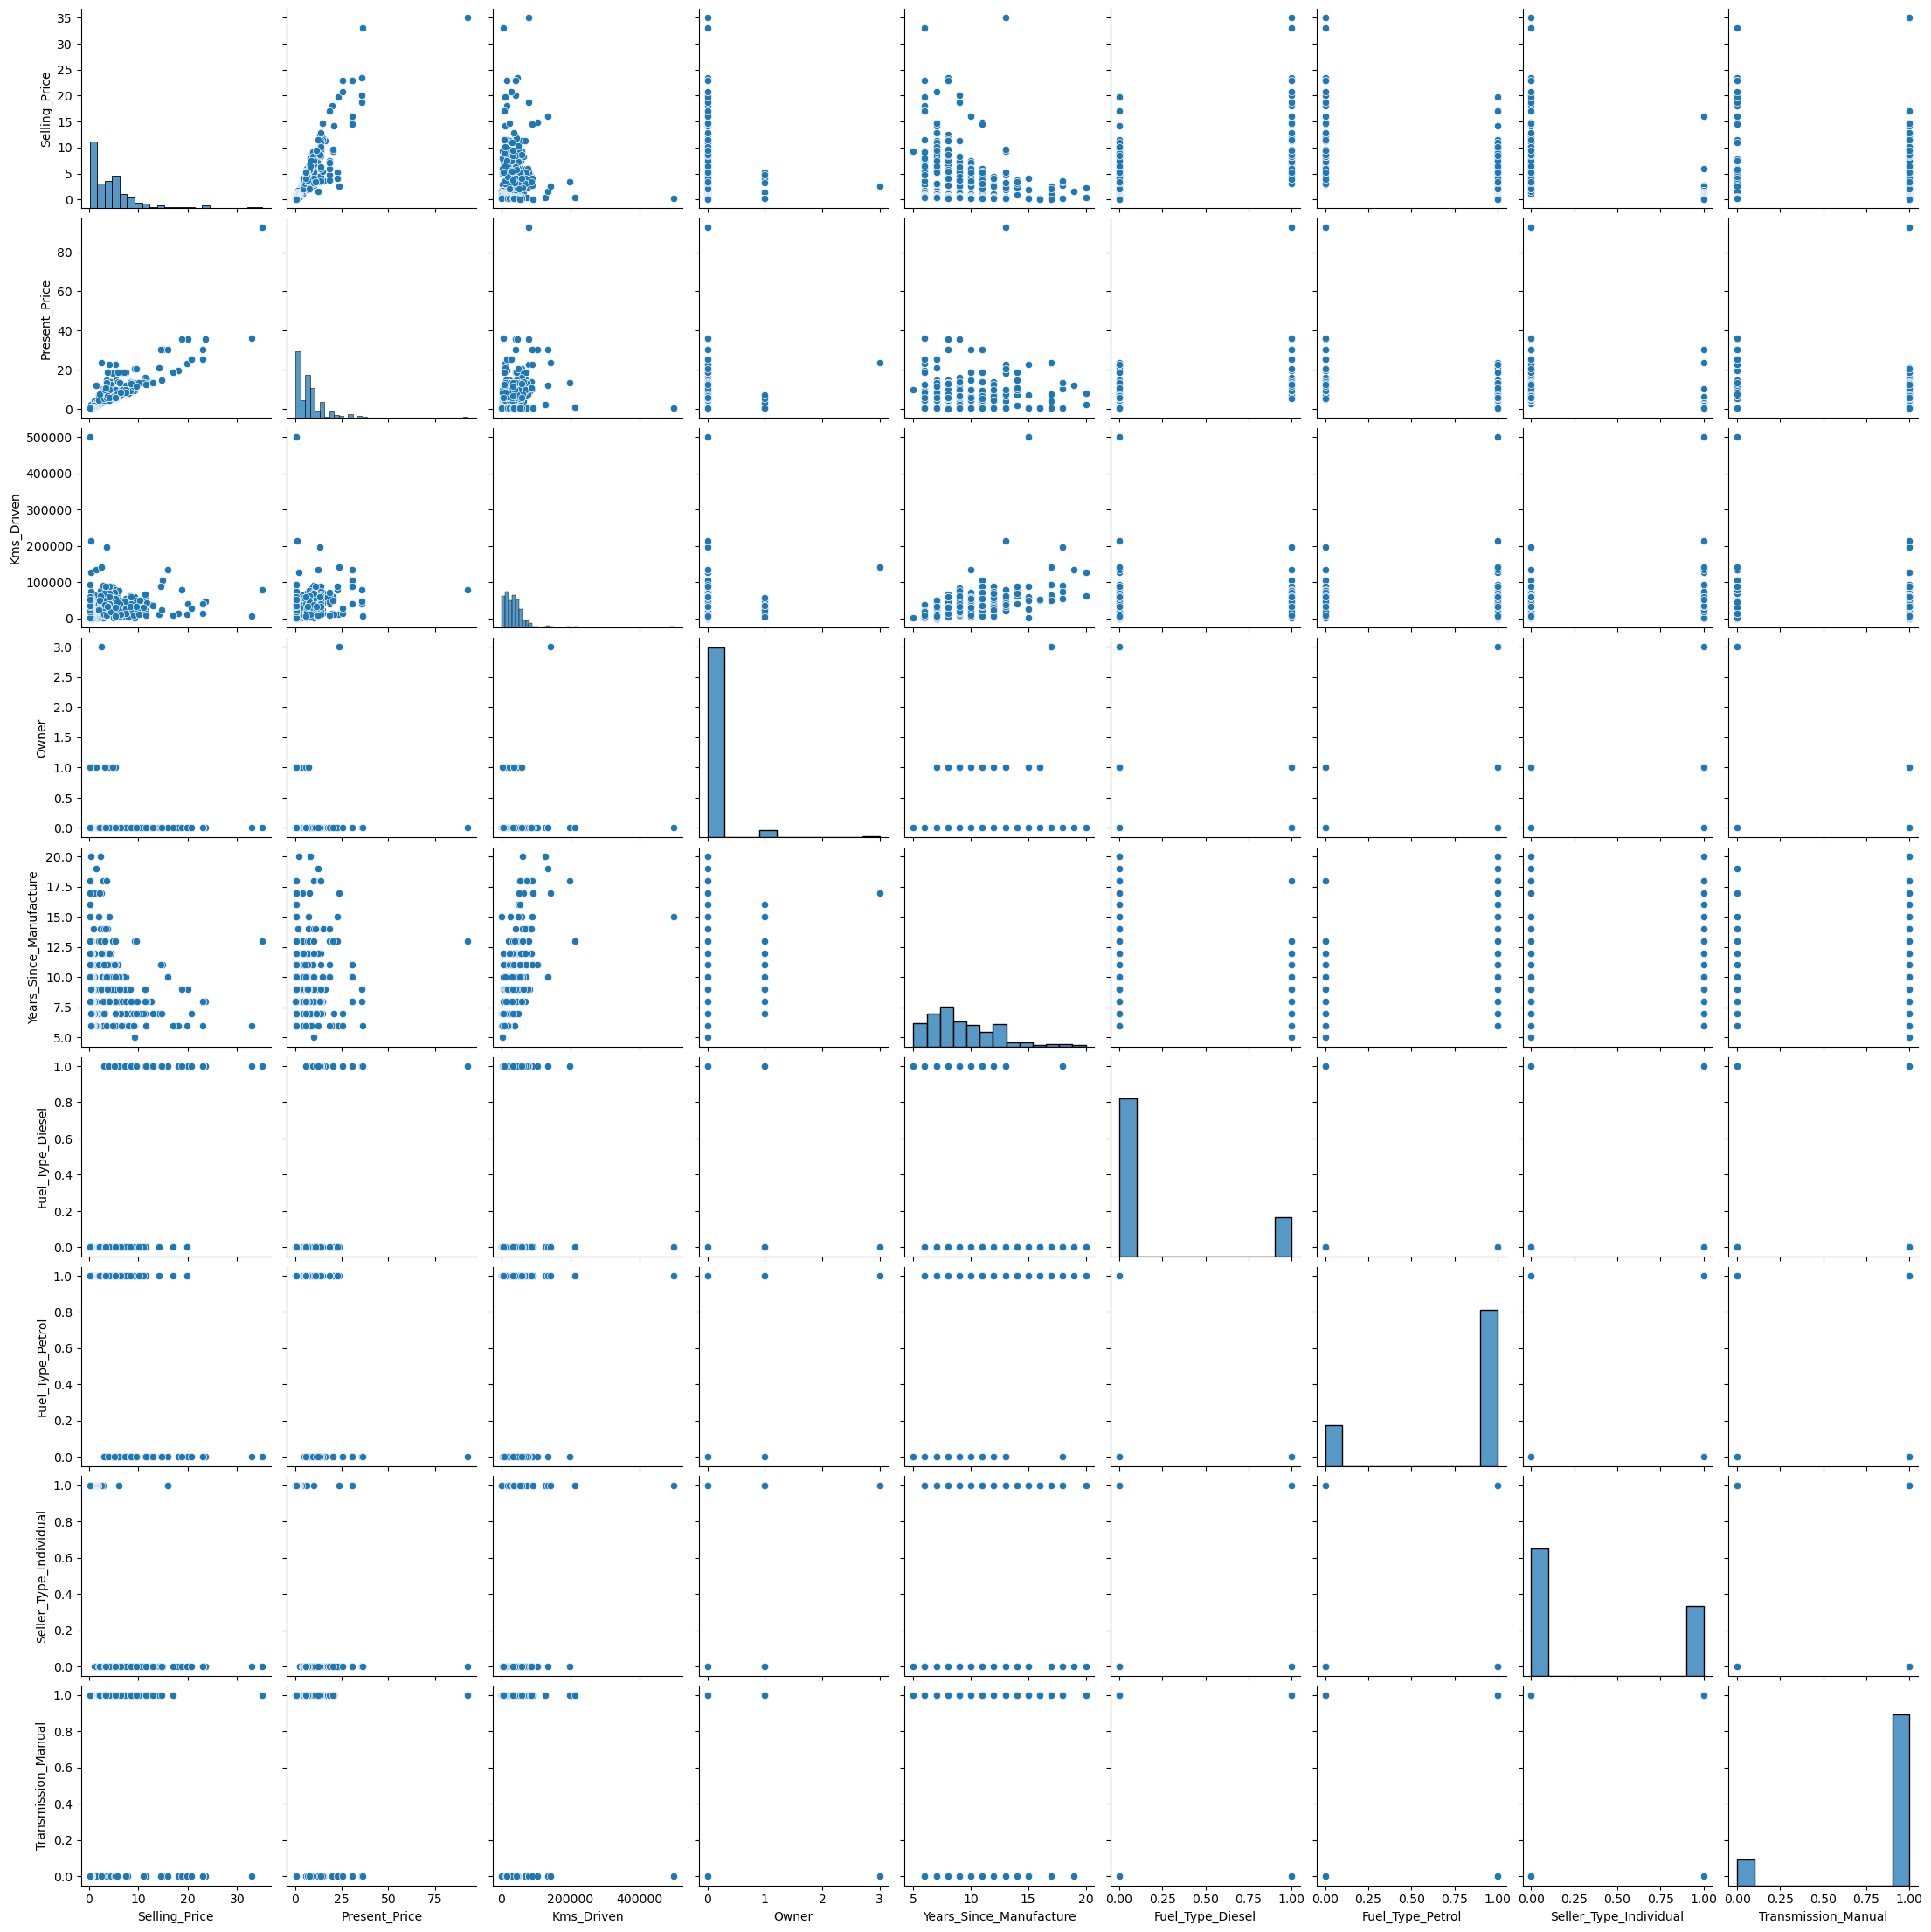

In [32]:
sns.pairplot(final_dataset)

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline

<AxesSubplot:>

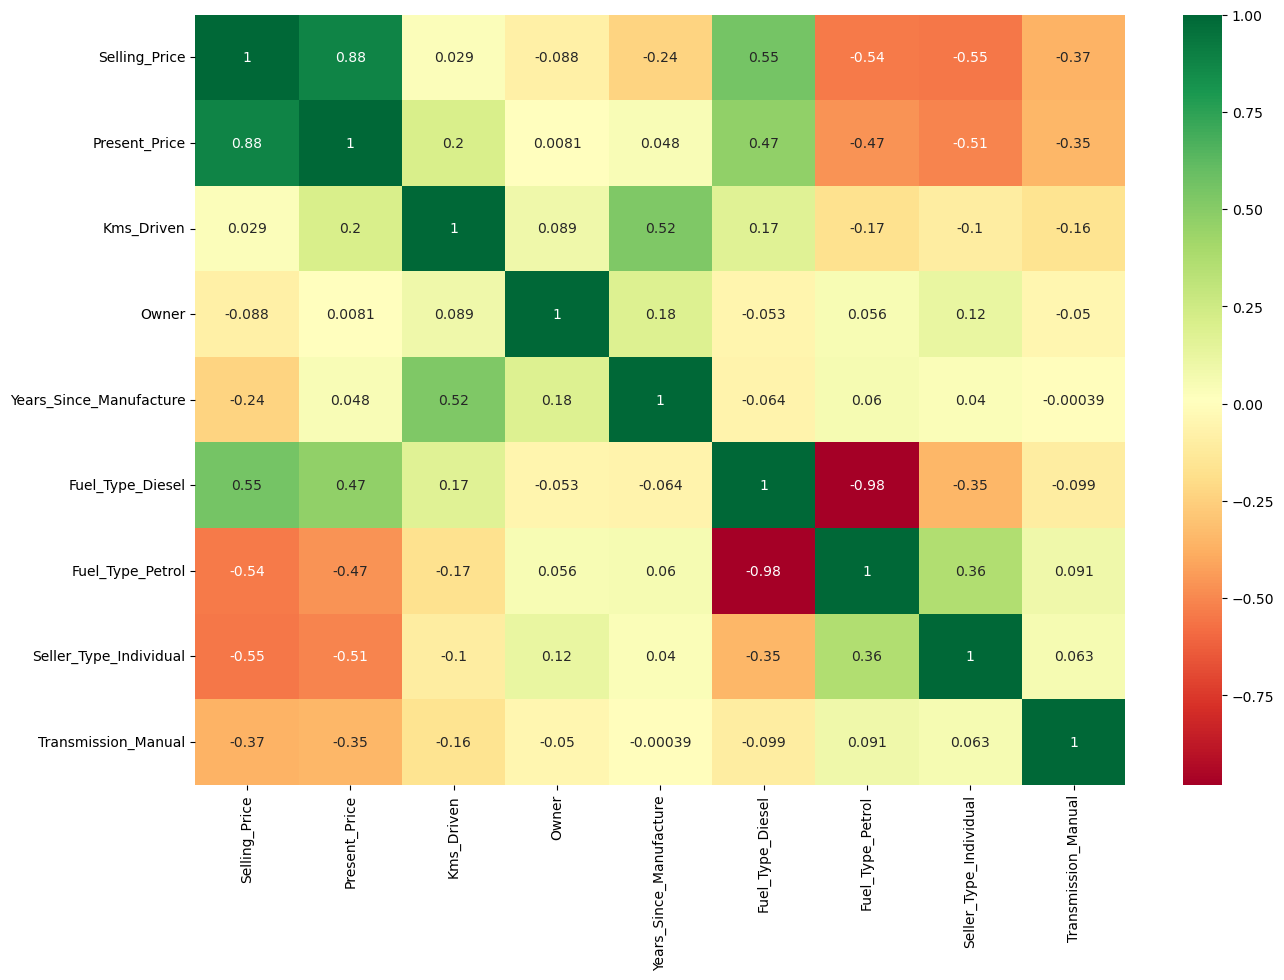

In [37]:
corrmat = final_dataset.corr()
top_corr_features = corrmat.index

plt.figure(figsize = (15,10))

sns.heatmap(final_dataset[top_corr_features].corr(),annot=True, cmap='RdYlGn')

In [38]:
final_dataset.head(2)

,Selling_Price,Present_Price,Kms_Driven,Owner,Years_Since_Manufacture,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,9,0,1,0,1
1,4.75,9.54,43000,0,10,1,0,0,1


In [40]:
## Dividing the data into dependent and independent variables
X = final_dataset.iloc[:,1:]
y = final_dataset.iloc[:,0]

In [41]:
X.head(2)

,Present_Price,Kms_Driven,Owner,Years_Since_Manufacture,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,9,0,1,0,1
1,9.54,43000,0,10,1,0,0,1


In [42]:
y.head(2)

0    3.35
1    4.75
Name: Selling_Price, dtype: float64

In [45]:
## Feature Importance

from sklearn.ensemble import ExtraTreesRegressor

model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [46]:
print(model.feature_importances_)

[4.03943853e-01 4.05787532e-02 3.60279542e-04 7.87004464e-02
 2.14581580e-01 9.63473430e-03 1.21079725e-01 1.31120629e-01]


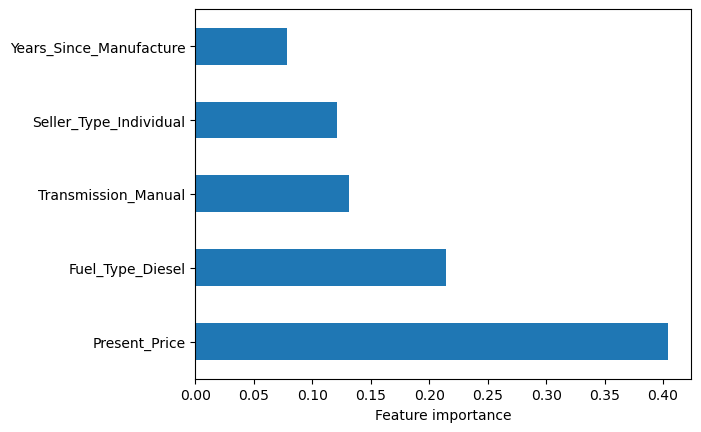

In [53]:
# plot graph of Feature Importance for better visualization

feat_importance = pd.Series(model.feature_importances_, index=X.columns)
feat_importance.nlargest(5).plot(kind='barh')
plt.xlabel('Feature importance')
plt.show()


In [67]:
## Train test Split

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)


In [55]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(240, 8)
(61, 8)
(240,)
(61,)


In [68]:
from sklearn.ensemble import RandomForestRegressor

rf_random = RandomForestRegressor()


In [69]:
import numpy as np

##### Hyperparameter Tuning
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)


[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [59]:
from sklearn.model_selection import RandomizedSearchCV

In [84]:
##### Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)

# Number of features to consider at every split
max_features = ['auto','sqrt']
print(max_features)

# Maximum Number of levels in tree
max_depth = [int(x) for x in np.linspace(5,30, num=6)]
print(max_depth)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
print(min_samples_split)

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]
print(min_samples_lead)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]
['auto', 'sqrt']
[5, 10, 15, 20, 25, 30]
[2, 5, 10, 15, 100]
[1, 2, 5, 10]


In [85]:
# Create the random grid
random_grid = { 'n_estimators': n_estimators,
                'max_features': max_features,
                'max_depth': max_depth,
                'min_samples_split': min_samples_split,
                'min_samples_leaf': min_samples_leaf
              }
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [86]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune

rf = RandomForestRegressor()

In [87]:
rf_random = RandomizedSearchCV(estimator=rf,
                                param_distributions=random_grid,
                                scoring = 'neg_mean_squared_error',
                                n_iter = 10,
                                cv = 5,
                                verbose = 2,
                                random_state=1,
                                n_jobs = 1)

In [88]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=600; total time=   0.5s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=600; total time=   0.4s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=600; total time=   0.5s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=600; total time=   0.6s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=600; total time=   0.5s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=800; total time=   0.5s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=800; total time=   0.6s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_est

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=1, scoring='neg_mean_squared_error', verbose=2)

In [90]:
predictions = rf_random.predict(X_test)
predictions

array([ 0.571 ,  2.95  ,  8.8754,  0.6007,  4.167 ,  6.348 ,  0.6078,
        3.032 ,  4.7927,  0.4199,  5.114 ,  3.013 ,  3.05  ,  2.5825,
        0.7424,  9.6198, 18.0819,  0.7359,  8.671 ,  0.4788,  9.5464,
        6.5235,  5.3045,  4.5112,  0.4532,  3.356 ,  7.5811,  4.338 ,
       10.975 ,  4.7385,  0.3593, 15.4864, 16.5894,  8.5818,  2.6145,
        1.1405,  3.1165, 16.2996,  2.5125,  4.231 , 12.0925,  0.4399,
        4.4925,  0.332 ,  0.3577,  0.1791,  5.518 ,  4.7625,  0.4071,
       11.1548, 21.9786,  2.576 ,  6.449 ,  7.922 ,  2.5895,  5.571 ,
        0.2368,  0.2411, 17.9654,  0.2437,  9.8785])

C:\Users\bhask\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

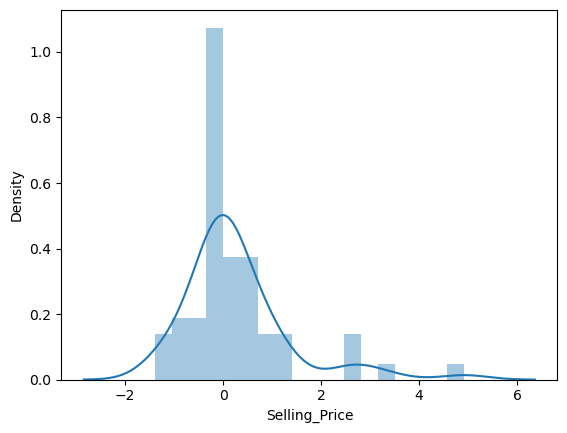

In [92]:
sns.distplot(y_test-predictions)

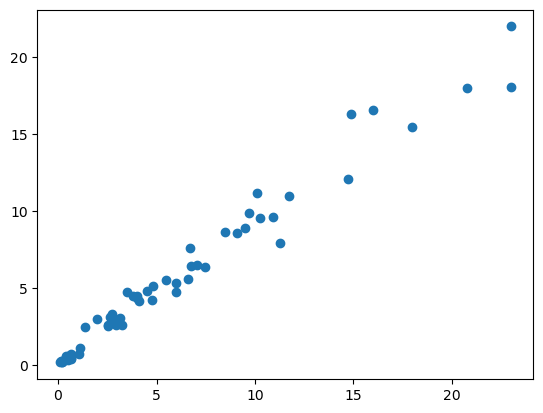

In [93]:
plt.scatter(y_test, predictions)

In [98]:
import pickle
# open a file, where we want to store the data
file = open('random_forest_regression_model.pkl','wb')

#dump information to that file
pickle.dump(rf_random, file)